In [206]:
#Import Package

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb

In [230]:
os.chdir("C://Users//nitis/Desktop/Data/ml_prj/")

In [231]:
#Reading a File

dfi=pd.read_csv("adult.csv")

In [5]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
dfi.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [39]:
for i in dfi.columns:
    print(i)
    print('?' in set(dfi[i])) 
    print("------")    

age
False
------
workclass
True
------
fnlwgt
False
------
education
False
------
educational-num
False
------
marital-status
False
------
occupation
True
------
relationship
False
------
race
False
------
gender
False
------
capital-gain
False
------
capital-loss
False
------
hours-per-week
False
------
native-country
True
------
income
False
------


In [48]:
print(dfi[dfi.eq('?').any(1)].shape)

(3620, 15)


In [51]:
dfi['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [61]:
dfi[dfi['workclass']=='?'].shape

(2799, 15)

In [119]:
dfi[dfi['occupation']=='?'].shape

(2809, 15)

In [120]:
dfi[dfi['native-country']=='?'].shape

(857, 15)

In [121]:
new_df=dfi.replace(to_replace="?",
           value="missing_value")

In [122]:
new_df.shape

(48842, 15)

In [123]:
# find categorical variables,
categorical_features = [c for c in new_df.columns if new_df[c].dtypes == 'O']

# find numerical variables,
numerical_features = [
    c for c in new_df.columns if new_df[c].dtypes != 'O']

In [124]:
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [147]:
numerical_features

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [161]:
X=new_df.drop(['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week','income'],axis=1)

In [162]:
#ordinal encode input variables
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()
X = ordinal.fit_transform(X)

In [163]:
dfx = pd.DataFrame(X, columns =['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country'])

In [164]:
dfx1=new_df[numerical_features]

In [165]:
type(dfx1)

pandas.core.frame.DataFrame

In [169]:
xin=new_df['income']

In [170]:
type(xin)

pandas.core.series.Series

In [171]:
xincome=xin.to_frame()

In [172]:
df_col_merged = pd.concat([dfx, dfx1,xincome], axis=1)

In [173]:
df_col_merged

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,3.0,1.0,4.0,6.0,3.0,2.0,1.0,38.0,25,226802,7,0,0,40,<=50K
1,3.0,11.0,2.0,4.0,0.0,4.0,1.0,38.0,38,89814,9,0,0,50,<=50K
2,1.0,7.0,2.0,10.0,0.0,4.0,1.0,38.0,28,336951,12,0,0,40,>50K
3,3.0,15.0,2.0,6.0,0.0,2.0,1.0,38.0,44,160323,10,7688,0,40,>50K
4,8.0,15.0,4.0,14.0,3.0,4.0,0.0,38.0,18,103497,10,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,3.0,7.0,2.0,12.0,5.0,4.0,0.0,38.0,27,257302,12,0,0,38,<=50K
48838,3.0,11.0,2.0,6.0,0.0,4.0,1.0,38.0,40,154374,9,0,0,40,>50K
48839,3.0,11.0,6.0,0.0,4.0,4.0,0.0,38.0,58,151910,9,0,0,40,<=50K
48840,3.0,11.0,4.0,0.0,3.0,4.0,1.0,38.0,22,201490,9,0,0,20,<=50K


In [174]:
y=df_col_merged['income']

In [175]:
# Label encode target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [179]:
type(y)

numpy.ndarray

In [180]:
yin = pd.DataFrame(y, columns = ['yincome'])

In [182]:
final_df=pd.concat([df_col_merged,yin], axis=1)

In [184]:
final_df.drop('income',axis=1,inplace=True)

In [186]:
final_df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,yincome
0,3.0,1.0,4.0,6.0,3.0,2.0,1.0,38.0,25,226802,7,0,0,40,0
1,3.0,11.0,2.0,4.0,0.0,4.0,1.0,38.0,38,89814,9,0,0,50,0
2,1.0,7.0,2.0,10.0,0.0,4.0,1.0,38.0,28,336951,12,0,0,40,1
3,3.0,15.0,2.0,6.0,0.0,2.0,1.0,38.0,44,160323,10,7688,0,40,1
4,8.0,15.0,4.0,14.0,3.0,4.0,0.0,38.0,18,103497,10,0,0,30,0


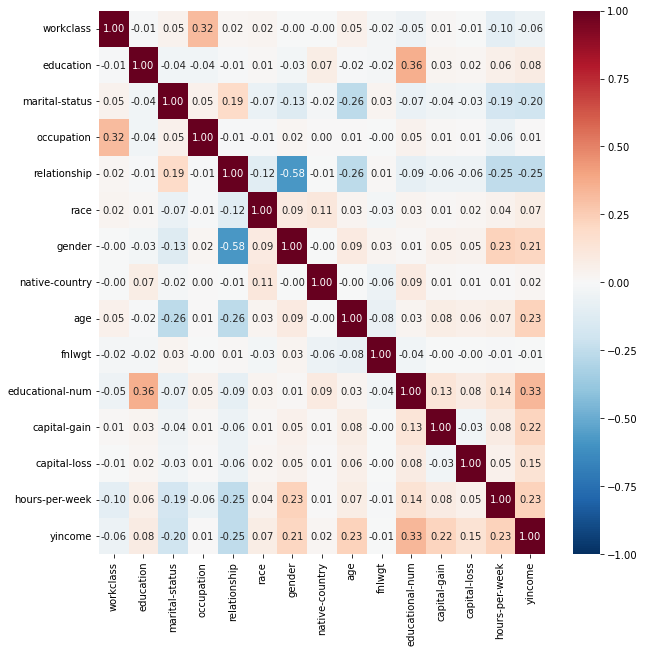

In [216]:
from seaborn import heatmap
import matplotlib.pyplot as plt
gif,ax=plt.subplots(figsize=(10,10))
ax=heatmap(final_df.corr(),fmt=".2f",annot=True,ax=ax,cmap="RdBu_r",vmin=-1,vmax=1)

In [187]:
X=final_df.drop('yincome',axis=1)

In [189]:
y=final_df['yincome']

In [191]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [195]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34189, 14)
(14653, 14)
(34189,)
(14653,)


In [196]:
#Logistic Regression

In [197]:
lgr=LogisticRegression()
lgr.fit(X_train,y_train)
print(lgr.score(X_train,y_train))
print(lgr.score(X_test,y_test))
y_pred=lgr.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.787504752990728
0.7992220023203439
[[10693  2402]
 [  540  1018]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     13095
           1       0.30      0.65      0.41      1558

    accuracy                           0.80     14653
   macro avg       0.62      0.73      0.64     14653
weighted avg       0.88      0.80      0.83     14653



In [199]:
from lightgbm import LGBMClassifier
ltc=LGBMClassifier()
ltc.fit(X_train,y_train)
print(ltc.score(X_train,y_train))
print(ltc.score(X_test,y_test))
y_pred=ltc.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8836760361519788
0.879751586705794
[[10593  1122]
 [  640  2298]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     11715
           1       0.67      0.78      0.72      2938

    accuracy                           0.88     14653
   macro avg       0.81      0.84      0.82     14653
weighted avg       0.89      0.88      0.88     14653



In [200]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()
dtr.fit(X_train,y_train)
print(dtr.score(X_train,y_train))
print(dtr.score(X_test,y_test))
y_pred=dtr.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9999122524788675
0.818194226438272
[[9841 1272]
 [1392 2148]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     11113
           1       0.63      0.61      0.62      3540

    accuracy                           0.82     14653
   macro avg       0.75      0.75      0.75     14653
weighted avg       0.82      0.82      0.82     14653



In [227]:
search_dict={'max_depth':[1,3,4,5,6,7,8,9,10,14,15,16,20],
            'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}

In [217]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [221]:
search_func=HalvingRandomSearchCV(estimator=dtr,param_distributions=search_dict,n_jobs=-1,max_resources=100,random_state=42)

In [222]:
search_func

HalvingRandomSearchCV(estimator=DecisionTreeClassifier(), max_resources=100,
                      n_jobs=-1,
                      param_distributions={'max_depth': [1, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 14, 15, 16, 20],
                                           'min_samples_leaf': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9,
                                                                10]},
                      random_state=42,
                      refit=<function _refit_callable at 0x000001AF552FAE50>)

In [223]:
search_func.fit(X_train,y_train)

HalvingRandomSearchCV(estimator=DecisionTreeClassifier(), max_resources=100,
                      n_jobs=-1,
                      param_distributions={'max_depth': [1, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 14, 15, 16, 20],
                                           'min_samples_leaf': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9,
                                                                10]},
                      random_state=42,
                      refit=<function _refit_callable at 0x000001AF552FAE50>)

In [226]:
print(search_func.best_params_)
print(search_func.best_score_)

{'min_samples_leaf': 10, 'max_depth': 3}
0.7803030303030303


In [228]:
from sklearn.tree import DecisionTreeClassifier
tunedtr=DecisionTreeClassifier(min_samples_leaf=10,max_depth=3)
tunedtr.fit(X_train,y_train)
print(tunedtr.score(X_train,y_train))
print(tunedtr.score(X_test,y_test))
y_pred=tunedtr.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.837140600778028
0.8453558998157374
[[10736  1769]
 [  497  1651]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.90     12505
           1       0.48      0.77      0.59      2148

    accuracy                           0.85     14653
   macro avg       0.72      0.81      0.75     14653
weighted avg       0.89      0.85      0.86     14653



In [201]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9998537541314458
0.8651470688596192
[[10478  1221]
 [  755  2199]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     11699
           1       0.64      0.74      0.69      2954

    accuracy                           0.87     14653
   macro avg       0.79      0.82      0.80     14653
weighted avg       0.87      0.87      0.87     14653



In [205]:
#!pip install xgboost

In [208]:
xgbc=xgb.XGBClassifier(random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [229]:
print(xgbc.score(X_train,y_train))
print(xgbc.score(X_test,y_test))
y_pred=xgbc.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9037702184913277
0.8775677335699175
[[10541  1102]
 [  692  2318]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     11643
           1       0.68      0.77      0.72      3010

    accuracy                           0.88     14653
   macro avg       0.81      0.84      0.82     14653
weighted avg       0.88      0.88      0.88     14653

